In [4]:
#Importing the necessary Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Loading the csv as a dataframe
data = pd.read_csv('df_no_duplicates.csv')
print(data)

       Year of Birth  Gender           Ethnicity Child's First Name  Count  \
0               2011  Female            Hispanic          Geraldine     13   
1               2011  Female            Hispanic                Gia     21   
2               2011  Female            Hispanic             Gianna     49   
3               2011  Female            Hispanic            Giselle     38   
4               2011  Female            Hispanic              Grace     36   
...              ...     ...                 ...                ...    ...   
18048           2018  Female  Black non hispanic               Nala     10   
18049           2018  Female  Black non hispanic            Royalty     10   
18050           2018  Female  Black non hispanic            Sariyah     10   
18051           2018  Female  Black non hispanic             Simone     10   
18052           2018  Female  Black non hispanic              Zahra     10   

       Rank  
0        75  
1        67  
2        42  
3      

In [14]:
# Group the data by name and gender
name_gender_groups = data.groupby(["Child's First Name", 'Gender'])

# Create empty lists to store names that change gender association
female_to_male = []
male_to_female = []

print(name_gender_groups)
# Loop through each name-gender group
for name_gender, data in name_gender_groups:
    if len(data) > 1:  # Check if the name has data for multiple genders
        # Get the counts for each gender
        counts = data['Count']
        # Check if counts for male and female are significant
        if 'Female' in counts.index and 'Male' in counts.index:
            if counts['Female'].sum() > 0 and counts['Male'].sum() > 0:
                # Compare counts and identify gender shifts
                if counts['Female'].sum() > counts['Male'].sum():
                    female_to_male.append(name_gender)
                else:
                    male_to_female.append(name_gender)

# Print names that shifted from female to male and vice versa
print("Names that shifted from Female to Male:", female_to_male)
print("Names that shifted from Male to Female:", male_to_female)

Names that shifted from Female to Male: []
Names that shifted from Male to Female: []


In [15]:
# Group by 'Child's First Name' and count unique occurrences for each gender
gender_counts = data.groupby(["Child's First Name", 'Gender']).size().unstack()

# Find names that appear for both female and male genders
names_both_genders = gender_counts.dropna().index.tolist()

print(names_both_genders)

['Zyaire']


In [21]:
# Grouping names by gender and counting occurrences
name_counts = data.groupby(["Child's First Name", 'Gender']).size().unstack()

# Printing names that appear for both genders and their counts
both_genders = name_counts.dropna()
print("Names that appear for both genders:")
print(both_genders)


Names that appear for both genders:
Gender              Female  Male
Child's First Name              
Alexis                19.0   9.0
Angel                 12.0  12.0
Ariel                 28.0  18.0
Avery                 32.0  25.0
Blake                  7.0  17.0
Cameron                2.0  32.0
Charlie                7.0  13.0
Dylan                 10.0  36.0
Eden                  14.0   8.0
Elliott                1.0   9.0
Emerson                9.0   2.0
Finley                 3.0   1.0
Jamie                  4.0   1.0
Jaylin                 8.0   1.0
Jia                    1.0   1.0
Jordan                 7.0  35.0
Kai                    1.0  32.0
Logan                  3.0  36.0
Milan                  9.0  10.0
Nana                   1.0   1.0
Parker                 5.0  11.0
Peyton                22.0   5.0
Phoenix                7.0   2.0
Quinn                  9.0   8.0
Remy                   2.0   2.0
Riley                 33.0  13.0
Rowan                  3.0   9.0
Royal  

In [23]:
print(data["Year of Birth"])

0        2011
1        2011
2        2011
3        2011
4        2011
         ... 
18048    2018
18049    2018
18050    2018
18051    2018
18052    2018
Name: Year of Birth, Length: 18053, dtype: int64


In [35]:
selected_names = ['Alexis', 'Angel', 'Ariel', 'Avery', 'Blake', 'Cameron', 'Charlie', 'Dylan', 'Eden', 'Elliott', 'Emerson', 'Finley', 'Jamie', 'Jaylin', 'Jia', 'Jordan', 'Kai', 'Logan', 'Milan', 'Nana', 'Parker', 'Peyton', 'Phoenix', 'Quinn', 'Remy', 'Riley', 'Rowan', 'Royal', 'Ryan', 'Sage', 'Shea', 'Shiloh', 'Skyler', 'Taylor', 'Tenzin', 'Yael']
data['Year of Birth'] = data['Year of Birth'].astype(str)
filtered_data = data[data["Child's First Name"].isin(selected_names)]
#filtered_data = filtered_data.sort_values(by="Child's First Name")
sorted_data = filtered_data.sort_values(by=["Child's First Name", 'Ethnicity', 'Gender'])
sorted_data

,Year of Birth,Gender,Ethnicity,Child's First Name,Count,Rank
1974,2012,Female,Asian and pacific islanders,Alexis,18,37
11372,2015,Female,Asian and pacific islanders,Alexis,12,41
1112,2011,Female,Black non hispanic,Alexis,13,42
2205,2012,Female,Black non hispanic,Alexis,12,45
4540,2013,Female,Black non hispanic,Alexis,12,45
...,...,...,...,...,...,...
8911,2017,Female,White non hispanic,Yael,20,74
11665,2015,Female,White non hispanic,Yael,19,74
11937,2016,Female,White non hispanic,Yael,20,74
15551,2019,Female,White non hispanic,Yael,22,72


In [32]:
data['Year of Birth'] = data['Year of Birth'].astype(str)
data.dtypes

Year of Birth         object
Gender                object
Ethnicity             object
Child's First Name    object
Count                  int64
Rank                   int64
dtype: object

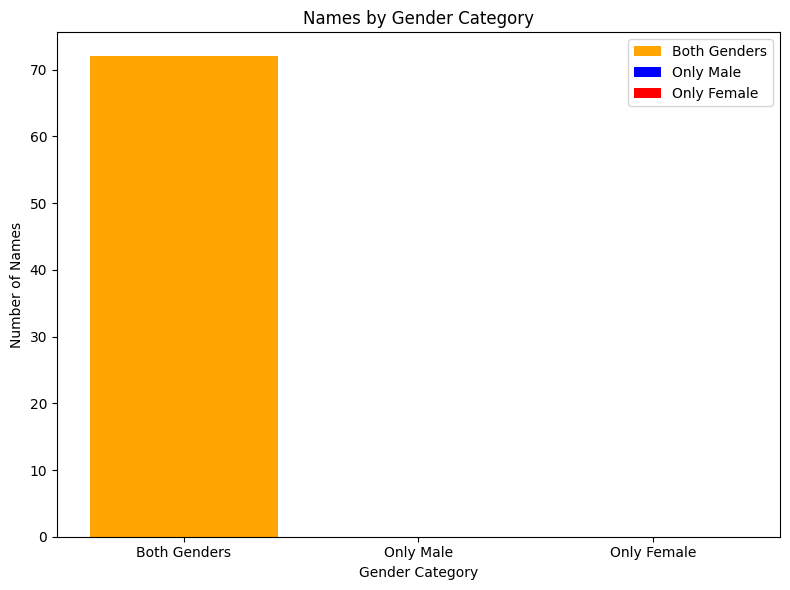

In [5]:
# Grouping the data by 'Child's First Name' and 'Gender' to count occurrences
name_gender_counts = data.groupby(["Child's First Name", "Gender"]).size().reset_index(name='Count')

# Filtering names that appear for both genders, only male, and only female
both_genders = name_gender_counts[name_gender_counts.duplicated(subset=["Child's First Name"], keep=False)]
only_male = name_gender_counts[name_gender_counts.duplicated(subset=["Child's First Name"], keep='first') & (name_gender_counts["Gender"] == "MALE")]
only_female = name_gender_counts[name_gender_counts.duplicated(subset=["Child's First Name"], keep='last') & (name_gender_counts["Gender"] == "FEMALE")]

# Plotting
plt.figure(figsize=(8, 6))
plt.bar(1, len(both_genders), color='orange', label='Both Genders')
plt.bar(2, len(only_male), color='blue', label='Only Male')
plt.bar(3, len(only_female), color='red', label='Only Female')

plt.xlabel('Gender Category')
plt.ylabel('Number of Names')
plt.title('Names by Gender Category')
plt.xticks([1, 2, 3], ['Both Genders', 'Only Male', 'Only Female'])
plt.legend()
plt.tight_layout()
plt.show()

plot for both, only and 
if it is female and ma every year or did it change for a specific gender? ?(maybe check fr only one thnicity)